# Classification binaire avec la régression logistique


Dans ce TP, nous allons apprendre à mettre en oeuvre un modèle de régression logistique pour la prédiction de labels binaires $y$.   
Rappel : la régression logistique repose sur une modélisation probabiliste, et donc plutôt que de prédire simplement 0/1, 
on calcule pour  chaque nouvelle observation un  score  entre 0 et 1 qui correspond à un estimateur de la probabilité $\mathbb P(y=1|x)$. 
 
## Données *score*

Le tableau *score* contient des données sur la solvabilité d'anciens clients en vue d'un crédit pour l'achat d'un véhicule.  La colonne `Y` indique si le client était solvable ($y=0$) ou pas ($y=1$) et c'est le label à prédire. Les autres colonnes du tableau sont des covariables avec des informations supplémentaires sur les clients. 
On cherche à construire un modèle qui explique la solvabilité en fonction de ces covariables : on veut donc apprendre la relation précise entre les covariables et le label à prédire.

Il n'est pas clair si toutes les covariables sont utiles pour cette tâche, donc dans un second temps, on se posera la question de la sélection des covariables qui servent à prédire.

## Préparer les données
### Charger les données à partir du fichier externe
On commence par charger les données stockées dans un fichier *day1_score.csv*. Si le fichier n'est pas trop gros, vous pouvez commencer par ouvrir ce fichier **avec un simple éditeur de texte**, pour identifier sa structure et paramétrer son importation. Vous constaterez que la première ligne indique les noms des variables, le séparateur est `;` et les décimales sont codées par des virgules (et non des points). Sinon, importation avec les paramètres standards et itérations successives pour trouver le bon format ! 

In [1]:
# Ci-dessous une commande pour afficher (hors python) les deux premières lignes du fichier et visualiser sa structure

In [2]:
%%bash
head -2 'data/day1_score.csv'

Y;X1;X2;X3;X4;X5;X6;X7;X8;X9;X10;X11;X12;X13;X14;X15;X16;X17;X18;X19;X20
1;0,2357642;5,913622368;10,21428088;9,090995286;8,860378697;8,71374237;1,164046936;10,02062761;13,22288529;687,612869;A;C;C;D;C;C;B;C;C;B


In [1]:

import os
import numpy as np
import pandas as pd

# Votre chemin vers les données. Par défaut celui du notebook 
path_data = '.'
# path_data = 'data/' 

# Lecture du fichier csv
df = pd.read_csv(os.path.join(path_data, 'day1_score.csv'), sep=';', decimal=',')

ModuleNotFoundError: No module named 'numpy'

### Exercice 1

- Familiarisez-vous avec les données (à l'aide de `shape`, `head`, `dtypes`, `describe`, `iloc`,`items`). 
- Séparer les données en 3 dataframes qu'on nomme :

    - `defaut` : pour les labels observés (`Y`)
    - `quanti`: dataframe avec toutes les covariables quantitatives
    - `quali`: dataframe avec toutes les covariables qualitatives

In [4]:
# Your answer

### Réponse

In [5]:
df.shape

(10000, 21)

Le jeu de données contient 10 000 lignes (individus) décrits par 21 variables (colonnes).  

In [6]:
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,1,0.235764,5.913622,10.214281,9.090995,8.860379,8.713742,1.164047,10.020628,13.222885,...,A,C,C,D,C,C,B,C,C,B
1,0,0.272896,5.644635,8.317874,7.797864,12.198094,10.421318,1.041913,10.396999,17.021061,...,A,C,D,C,C,C,B,D,C,A
2,0,0.283553,4.885598,9.857154,8.905713,9.851255,9.129555,1.104167,9.703632,15.226055,...,A,C,D,C,C,C,B,C,C,A
3,0,0.256266,5.408822,9.766608,9.026237,9.731508,8.538705,1.270431,11.060679,15.080628,...,A,B,C,C,C,C,B,C,C,A
4,0,0.146725,6.809967,8.374727,9.643390,10.075919,6.530725,1.307692,12.538993,11.765490,...,A,C,D,D,C,C,B,D,C,A


In [7]:
df.dtypes

Y        int64
X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11     object
X12     object
X13     object
X14     object
X15     object
X16     object
X17     object
X18     object
X19     object
X20     object
dtype: object

La première variable `Y` est la variable binaire à prédire. Il y a ensuite 10 variables quantitatives (`X1` à `X10`) et 10 variables qualitatives (`X11` à `X20`).

Résumé des variables quantitatives :

In [8]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.150000,0.219998,5.368112,8.608544,8.658652,10.315210,8.339753,1.048381,10.139954,13.461909,516.752378
std,0.357089,0.056868,1.164691,1.416576,1.414721,1.499355,1.232685,0.166093,1.544179,1.891698,107.123173
min,0.000000,-0.026780,0.905713,2.418750,3.331149,4.569676,3.497778,0.416426,3.609027,6.106315,71.097334
25%,0.000000,0.181454,4.592732,7.662919,7.705792,9.302691,7.496417,0.937231,9.094759,12.176467,445.432326
50%,0.000000,0.219981,5.373140,8.599041,8.657755,10.305086,8.331352,1.047099,10.131072,13.450765,517.036968
75%,0.000000,0.257330,6.141837,9.567110,9.613894,11.342159,9.174269,1.159312,11.189802,14.749339,589.887091
max,1.000000,0.468225,9.735571,15.650962,13.736798,15.476952,13.020388,1.665225,15.249689,21.272002,958.932459


Si on souhaite un résumé incluant les variables qualitatives :

In [9]:
# Quelques stats descriptives, quantitatives et qualitatives, met des NaN si incongru.
df.describe(include='all')

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,4,4,4,3,3,4,3,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,C,D,C,C,C,B,C,C,A
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9856,6289,5001,6641,8930,9655,9888,5830,6501,6752
mean,0.150000,0.219998,5.368112,8.608544,8.658652,10.315210,8.339753,1.048381,10.139954,13.461909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.357089,0.056868,1.164691,1.416576,1.414721,1.499355,1.232685,0.166093,1.544179,1.891698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,-0.026780,0.905713,2.418750,3.331149,4.569676,3.497778,0.416426,3.609027,6.106315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.181454,4.592732,7.662919,7.705792,9.302691,7.496417,0.937231,9.094759,12.176467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,0.219981,5.373140,8.599041,8.657755,10.305086,8.331352,1.047099,10.131072,13.450765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,0.257330,6.141837,9.567110,9.613894,11.342159,9.174269,1.159312,11.189802,14.749339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Noter que `freq` indique le comptage de la modalité la plus fréquente.

In [10]:
# Combien de modalités pour chaque variable quali ?
for colname, col in df.iloc[:, 11:21].items():  # .items() permet d'itérer sur les noms des colonnes et leurs contenus
    print(colname + ':')
    print(col.value_counts())
    print('-' * 16)

X11:
A    9856
B     144
Name: X11, dtype: int64
----------------
X12:
C    6289
B    3711
Name: X12, dtype: int64
----------------
X13:
D    5001
C    4069
B     544
A     386
Name: X13, dtype: int64
----------------
X14:
C    6641
D    2198
B    1130
A      31
Name: X14, dtype: int64
----------------
X15:
C    8930
D     578
B     451
A      41
Name: X15, dtype: int64
----------------
X16:
C    9655
B     298
D      47
Name: X16, dtype: int64
----------------
X17:
B    9888
A      59
C      53
Name: X17, dtype: int64
----------------
X18:
C    5830
D    3807
B     350
A      13
Name: X18, dtype: int64
----------------
X19:
C    6501
B    3231
A     268
Name: X19, dtype: int64
----------------
X20:
A    6752
B    3155
C      93
Name: X20, dtype: int64
----------------


Séparons les différents types de variables :

In [11]:
# Identification selon le type de variable
defaut = df['Y'] 
quanti = df.iloc[:, 1:11]
quali = df.iloc[:, 11:21]

### Standardisation des données quantitatives et codage des qualitatives

On ne travaille que très rarement sur des donnnées brutes. 

Pour des  **variables quantitatives**, il est important des les  **standardiser** (centrer et réduire) afin de les ramener à  des échelles comparables. Cela diminue également les problèmes numériques. 

Pour une **variable qualitative**, il n'y a pas (en général) d'ordre naturel de ses modalités. Donc il ne faut pas bêtement remplacer des catégories *A*, *B*, *C*,... par 1, 2, 3,... Le problème est que dans un modèle de régression, on va calculer par exemple des moyennes sur ces valeurs, mais en général *B* n'est pas la moyenne de *A* et *C* (alors que c'est le cas pour la valeur 2 par rapport à 1 et 3). Il nous faut alors un encodage qui est invariant à l'ordre des modalités. On utilise  le **one-hot encoding** qui consiste à transformer une variable qualitative en variables binaires dites **dummies**. Une variable avec K modalités est transformée en K-1 variables binaires. Chacune de ces variables binaires indique pour une catégorie spécifiée si la variable observée est égale à cette catégorie ou pas. Il suffit de K-1 variables binaires pour encoder K catégories, car l'information sur la K-ième catégorie peut être déduite des K-1 autres variables binaires. Donc, utiliser K variables binaires introduirait des corrélations entre les colonnes, ce qu'il faut éviter dans un cadre de régression.

### Exercice 2

- Standardiser les données quantitatives.
- Créer des dummies pour toutes les variables qualitatives avec la fonction `get_dummies` de `pandas` et l'option `drop_first=True`.
- Créer un seul dataframe contenant toutes les covariables transformées (quantitatives et qualitatives).

In [12]:
# Your answer

### Réponse

In [13]:
# Reduction des variables quantitatives

# Méthode directe 
quantiN = (quanti-quanti.mean())/quanti.std()

## Méthode sophistiquée avec StandardScaler
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#quantiN = pd.DataFrame(sc.fit_transform(quanti), columns=quanti.columns)

# Nouveau dataframe avec les var quanti normalisées
df_trav = pd.concat([quantiN, quali], axis=1) 


In [14]:
# On transforme les variables qualitatives en dummies
df_trav = pd.get_dummies(df_trav, drop_first=True)  # .getdummies() n'agit que sur les var qualitatives et garde les quantitatives
# Ne pas oublier 'drop_first=True' sinon on garde K dummies pour chaque variable qui a K modalités ! 
df_trav.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X16_D,X17_B,X17_C,X18_B,X18_C,X18_D,X19_B,X19_C,X20_B,X20_C
0,0.277237,0.468374,1.133534,0.305603,-0.970305,0.303394,0.696395,-0.077275,-0.126354,1.594991,...,0,1,0,0,1,0,0,1,1,0
1,0.930195,0.237422,-0.205192,-0.608451,1.255797,1.688643,-0.038943,0.166460,1.881459,-0.501581,...,0,1,0,0,0,1,0,1,0,0
2,1.117586,-0.414285,0.881428,0.174636,-0.309436,0.640716,0.335875,-0.282560,0.932573,0.084465,...,0,1,0,0,1,0,0,1,0,0
3,0.637761,0.034954,0.817509,0.259828,-0.389302,0.161397,1.336907,0.596255,0.855696,0.996680,...,0,1,0,0,1,0,0,1,0,0
4,-1.288494,1.237972,-0.165058,0.696065,-0.159595,-1.467550,1.561242,1.553602,-0.896771,1.196941,...,0,1,0,0,0,1,0,1,0,0


In [15]:
# Noter qu'à présent toutes les variables sont quantitatives (plus besoin de l'option include="all" dans la fonction `describe`)
df_trav.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X16_D,X17_B,X17_C,X18_B,X18_C,X18_D,X19_B,X19_C,X20_B,X20_C
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.980971e-15,6.965412e-15,9.959100e-15,1.306198e-14,-1.922769e-14,3.787526e-15,-1.518721e-14,-5.227063e-15,-2.404570e-14,-1.505751e-14,...,0.004700,0.988800,0.005300,0.035000,0.583000,0.380700,0.323100,0.650100,0.315500,0.009300
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.068399,0.105241,0.072612,0.183789,0.493088,0.485583,0.467684,0.476962,0.464738,0.095992
min,-4.339513e+00,-3.831401e+00,-4.369547e+00,-3.765763e+00,-3.832005e+00,-3.927989e+00,-3.804827e+00,-4.229386e+00,-3.888355e+00,-4.160211e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.777903e-01,-6.657390e-01,-6.675431e-01,-6.735323e-01,-6.753027e-01,-6.841453e-01,-6.691990e-01,-6.768618e-01,-6.795179e-01,-6.657761e-01,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.995981e-04,4.317260e-03,-6.708338e-03,-6.338812e-04,-6.752042e-03,-6.815186e-03,-7.719327e-03,-5.752451e-03,-5.891373e-03,2.656663e-03,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.564665e-01,6.643182e-01,6.766780e-01,6.752157e-01,6.849280e-01,6.769903e-01,6.678880e-01,6.798746e-01,6.805682e-01,6.827161e-01,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,4.364989e+00,3.749887e+00,4.971437e+00,3.589504e+00,3.442643e+00,3.797105e+00,3.713850e+00,3.309031e+00,4.128615e+00,4.127772e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df_trav.dtypes

X1       float64
X2       float64
X3       float64
X4       float64
X5       float64
X6       float64
X7       float64
X8       float64
X9       float64
X10      float64
X11_B      uint8
X12_C      uint8
X13_B      uint8
X13_C      uint8
X13_D      uint8
X14_B      uint8
X14_C      uint8
X14_D      uint8
X15_B      uint8
X15_C      uint8
X15_D      uint8
X16_C      uint8
X16_D      uint8
X17_B      uint8
X17_C      uint8
X18_B      uint8
X18_C      uint8
X18_D      uint8
X19_B      uint8
X19_C      uint8
X20_B      uint8
X20_C      uint8
dtype: object

In [17]:
# On enregistre les noms des colonnes
features_names = df_trav.columns.tolist()
print(features_names)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11_B', 'X12_C', 'X13_B', 'X13_C', 'X13_D', 'X14_B', 'X14_C', 'X14_D', 'X15_B', 'X15_C', 'X15_D', 'X16_C', 'X16_D', 'X17_B', 'X17_C', 'X18_B', 'X18_C', 'X18_D', 'X19_B', 'X19_C', 'X20_B', 'X20_C']


On peut éventuellement sauvegarder notre jeu de données. Il est prêt à être analysé.

In [18]:
## Si on veut sauvegarder ce jeu de données dans un fichier

#import pickle as pkl

## Sauver le jeu de données dans un fichier 
#with open(os.path.join(path_travail, 'df_dumN.pkl'), 'wb') as f:
#    pkl.dump({'features': df_trav, 'labels': defaut}, f)

### Échantillons d'apprentissage et de test

In [19]:
# On appelle les données : features X et variables à prédire Y 
X, Y = df_trav, defaut

# Si on veut recharger le jeu de données depuis le fichier sauvegardé
# Chargement base de travail
#with open(os.path.join(path_travail, 'df_dumN.pkl'), 'rb') as f:
#    data = pkl.load(f)  
#X, Y = data['features'], data['labels']


On rappelle que la modélisation se fait en trois temps :
- on sépare les données : TRAIN / TEST
- on apprend le modèle sur TRAIN
- on évalue la performance du modèle appris sur TEST

On coupe les données de façon aléatoire en deux groupes. 
Le plus souvent, on les sépare  en 80% pour l'apprentissage et 20% pour le test. D'autres pourcentages courants sont 67-33 ou 50-50.
On   utilise la  fonction `train_test_split` du package `sklearn.model_selection` pour séparer aléatoirement les données. 

Même si le split est aléatoire, on souhaite que les deux échantillons soient tous les deux représentatifs du problème. En particulier, on voudrait qu'ils contiennent le même pourcentage de labels 0 et 1, ce qui est notamment important quand  les labels ne sont pas équilibrés (pas 50-50).

Ici, le taux de 1 (i.e. la proportion de clients qui n'ont pas remboursé leur crédit) dans la variable à prédire `Y` dans l'échantillon global est :

In [20]:
# Calculons le taux de cible
tx_cible = Y.mean()
# Affichons le taux de cible joliment
print("Taux de cible: {taux:.2f}%".format(taux=100 * tx_cible))

Taux de cible: 15.00%


Le taux est bas, donc une coupe totalement aléatoire des données risque de produire des sous-échantillons où l'un des deux ne contient que  peu de labels qui valent 1. Cela peut être problématique (pour l'apprentissage du modèle comme pour l'évaluation de la méthode).
En pratique, dans des problèmes de classification, on force alors la même répartition des labels dans les deux échantillons TRAIN et TEST, via l'option `stratify`.

### Exercice 3

Utiliser la  fonction `train_test_split` du package `sklearn.model_selection` pour séparer les données en `train` et `test` avec 80% pour les données `train` et 20% pour les données `test`. On force la même répartition des labels dans les deux sous-échantillons.
**Pour ce TP uniquement** fixons la graine du générateur aléatoire (via l'option `random_state=5`) afin que nous travaillions tous sur les mêmes données `train` et `test`. En effet,  la sélection de variables par pénalisation $\ell_1$ est très instable et dépend énormément du split des données effectué. 

In [21]:
# Your answer

### Réponse

In [22]:
from sklearn.model_selection import train_test_split

# split TRAIN / TEST
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=5)

In [23]:
print(Y_train.mean(), Y_test.mean())

0.15 0.15


On voit que les échantillons  `train` et `test` ont tous les deux le même taux de 1.

## Apprentissage par régression logistique 

Pour commencer, on va apprendre, sur les données `train`, les coefficients de la régression logistique de `Y` sur l'ensemble des variables `X` (soit 32 variables). 

### Exercice 4
Utiliser la fonction `LogisticRegression` de `sklearn.linear_model` pour effectuer une régression logistique simple (ie sans pénalisation). Visualiser les coefficients estimés (intercept et variables). Puis sur le jeu `test`, obtenez les probabilités de défaut de chaque individu (`predict_proba()`) et les prédictions (`predict()`) pour le seuil par défaut $t=1/2$. Utiliser la fonction `score` pour calculer le pourcentage de bien classés (`accuracy`). 

In [24]:
# Your answer

### Réponse

In [25]:
from sklearn.linear_model import LogisticRegression

# Définition du modèle de régression logistique : sans pénalisation 
logreg = LogisticRegression(penalty='none', max_iter=1000) # sans l'option max_iter, on peut avoir un nb max d'itérations insuffisant pour atteindre la convergence
# On estime les paramètres de ce modèle sur les données 
result = logreg.fit(X_train, Y_train)

# Resultats de la regression logistique
# On visualise l'intercept b et les 32 coefficients w_i estimés pour les 32 variables 
print(result.intercept_)
print(result.coef_)

[-5.06450311]
[[-2.10887448 -0.72133907 -0.88459458  1.34251528 -2.491671    2.71607617
   1.25789765  1.51835748 -0.04047429 -1.25079781 -0.2800789  -0.23282628
  -0.82131311  0.14379685  0.15601985  0.89680244  1.63309359  0.92256306
  -0.03796627  0.84457049  0.19728725 -0.01325583 -0.53591694  0.29795628
   1.2601269  -0.20656975  0.20007834  1.01481401 -0.64002956  0.14069188
   0.27218674 -0.18627112]]


In [26]:
# Probabilités de non-défaut (y=0) et de défaut (y=1) pour chaque individu dans le jeu test 
result.predict_proba(X_test)

array([[0.93638199, 0.06361801],
       [0.69369564, 0.30630436],
       [0.88468836, 0.11531164],
       ...,
       [0.8626137 , 0.1373863 ],
       [0.52531925, 0.47468075],
       [0.8370689 , 0.1629311 ]])

On obtient deux colonnes qui donnent les probas prédites pour les deux labels 0 et 1.
On peut constater que pour certains individus, la prédiction est très tranchée (93% vs 7%) tandis que pour d'autres, la prédiction est beaucoup plus incertaine (52% vs 48%).

In [27]:
# Prédiction du label sur nos données test - ici on applique le seuil t=1/2 sur les probas ci-dessus
Y_pred =result.predict(X_test) 
print(Y_pred)
print(Y_pred.mean())

[0 0 0 ... 0 0 0]
0.045


On constate qu'on prédit seulement 4,5% de défaut, alors que les jeux de données ont été stratifiés, donc on sait qu'il y a 15% de défaut dans les données TEST.

In [28]:
# Accuracy (ie pourcentage de bien classés) sur les données de test
result.score(X_test,Y_test)

## Autre façon d'obtenir la même chose :
#from sklearn.metrics import accuracy_score

#accuracy_score(Y_test,Y_pred)

0.864

L'accuracy est bonne alors qu'on a peu de défaut prédit : c'est parce que les 0 sont très nombreux ! Un prédicteur constant à 0 donne une accuracy de 85% !

In [29]:
# Matrice de confusion 
from sklearn import metrics

metrics.confusion_matrix(Y_test, Y_pred)

array([[1669,   31],
       [ 241,   59]])

### Courbes ROC et precision-recall
À présent on veut regarder les performances du classifieur en faisant jouer des rôles non symétriques aux valeurs 0 et 1. En effet pour une banque, il est plus important d'identifier les vrais négatifs ($y=0$ et $\hat y=0$ ie les clients à qui on va octroyer un crédit et qui vont effectivement le rembourser) alors qu'on peut se permettre d'avoir des faux positifs ($y=0$ et $\hat y =1$ ie des clients à qui on n'accorde pas le crédit alors qu'ils l'auraient remboursé). 

Noter que du point de vue du client, les priorités ne sont pas les mêmes ! De même si on s'intéressait à un organisme social de micro-crédit, on voudrait au contraire limiter les faux positifs. Suivant le problème considéré toutes ces quantités (TP, FP, TN, FN) n'ont pas la même importance. 

### Exercice 5

Tracer les courbes ROC et precision-recall obtenues sur le jeu `test`. 

À titre de comparaison, on tracera aussi les mêmes courbes obtenues sur le jeu de données `train`. On rappelle que les performances du classifieur doivent toujours être calculées à partir d'un échantillon `test` indépendant du jeu de données `train` qui a servi à la construction du classifieur. Cependant il est utile de comparer les courbes ROC calculées avec la base TEST versus la base TRAIN pour détecter un sur-apprentissage potentiel. 

On utilisera la librairie `matplotlib.pyplot` pour tracer les graphiques et les fonctions `roc_curve` et `auc` de `sklearn.metrics` pour calculer les points de la courbe ROC et l'AUC.  


In [30]:
# Your answer

### Réponse

AUC sur test=0.79
AUC sur train=0.78


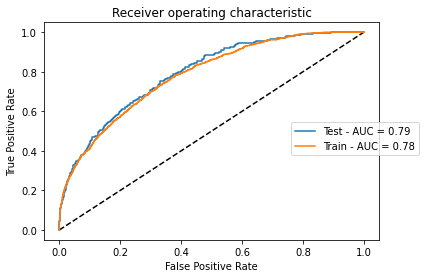

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# COURBES ROC ET AUC 

fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

# Sur le jeu de TEST, on reprend les scores prédits (probas que Y=1) 
scores_test= logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test, scores_test) # on calcule les FPR et TPR pour tout un ensemble de seuils t non précisés
ax.plot(fpr, tpr, label=f"Test - AUC = %0.2f" % auc(fpr, tpr))
print('AUC sur test=%.2f' %metrics.auc(fpr, tpr))

# La même courbe mais sur le jeu TRAIN
scores_train= logreg.predict_proba(X_train)[:,1]
fpr, tpr, _ = roc_curve(Y_train,scores_train)
ax.plot(fpr, tpr, label=f"Train - AUC = %0.2f" % auc(fpr, tpr))
print('AUC sur train=%.2f' %metrics.auc(fpr, tpr))

fig.legend(loc="center right")
plt.show()

In [32]:
# Variante pour AUC-ROC
from sklearn.metrics import roc_auc_score 

AUC_test = roc_auc_score(Y_test, scores_test)
print('ROC_AUC_Score sur test =%.2f' %AUC_test)
AUC_train = roc_auc_score(Y_train, scores_train)
print('ROC_AUC_Score sur train=%.2f' %AUC_train)


ROC_AUC_Score sur test =0.79
ROC_AUC_Score sur train=0.78


**Warning** : l'AUC est meilleur sur le test, c'est chelou. Bosser sur la graine ou virer des dummies pourries ?

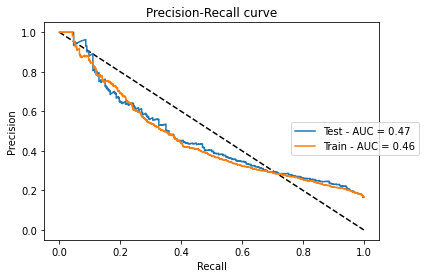

In [33]:
# COURBES PRECISION-RECALL

fig, ax = plt.subplots()
ax.plot([0, 1], [1,0], 'k--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')

# Sur le jeu de TEST :
precision, recall, _ = precision_recall_curve(Y_test, scores_test)
# Attention le recall est en abscisses et la précision en ordonnée
ax.plot(recall, precision, label=f"Test - AUC = %0.2f" % metrics.auc(recall,precision)) 
# On calcule l'aire sous la courbe precision-recall exactement comme pour la courbe ROC

# La même courbe mais sur le jeu TRAIN
precision, recall, _ = precision_recall_curve(Y_train,scores_train)
ax.plot(recall, precision, label=f"Train - AUC = %0.2f" % metrics.auc(recall,precision))

fig.legend(loc="center right")
plt.show()

**Remarques** : 
* les courbes ROC et Precision-Recall ne se lisent pas de la même façon.
* Ici on a une AUC-PR très mauvaise. En effet, le classifieur a tendance à prédire beaucoup de 0 et les classes sont non équilibrées. 


## Régression logistique avec pénalité Ridge

Dans cette partie, on va utiliser une pénalité en norme 2 (dite $\ell_2$ ou Ridge) sur les coefficients de la régression. Cette pénalité Ridge a tendance à "rétrecir" les valeurs des coefficients (on parle de shrinkage) et régularise la solution. 

### Exercice 6

Mettre en oeuvre la régression logistique avec pénalité $\ell_2$ sur les données d'apprentissage. On utilisera une pénalité assez forte (ex $C=0.01$). 
Comparer les valeurs des coefficients avec le cas sans pénalité (visualisez l'effet de shrinkage). 
Évaluer les performances du classifieur sur les données de test.
Pour les deux classifieurs (logreg et sa version pénalisée en norme 2), comparer les courbes de score sur les données Test ainsi que les performances en termes de courbes (ROC ou precision-recall) et d'AUC. 

In [34]:
# Your answer

### Réponse

In [35]:
# Définition du modèle de régression logistique : pénalisation norme 2 
logreg_l2 = LogisticRegression(penalty='l2', C=0.01, max_iter=1000)
# On estime les paramètres de ce modèle sur les données 
result_l2 = logreg_l2.fit(X_train, Y_train)

# Resultats de la regression logistique
# On visualise l'intercept b et les 32 coefficients w_i estimés pour les 32 variables - On les compare aux précédents
print(result_l2.intercept_)
print(result.intercept_ )
print('------')
print(result_l2.coef_)
print(result.coef_)

[-2.62616418]
[-5.06450311]
------
[[-0.2878335  -0.0561909   0.0273718  -0.06136059  0.09021064 -0.11752852
   0.76559751  0.06250618 -0.05422125  0.10288588 -0.01725398 -0.06215112
  -0.18821072  0.10162493  0.10303769 -0.15440848  0.31219789 -0.13936729
  -0.13595192  0.24467816 -0.09240645  0.02751447 -0.01508177 -0.02823709
   0.0484185  -0.12749448 -0.21884222  0.35254349 -0.28791579  0.29314883
   0.20799594 -0.01923407]]
[[-2.10887448 -0.72133907 -0.88459458  1.34251528 -2.491671    2.71607617
   1.25789765  1.51835748 -0.04047429 -1.25079781 -0.2800789  -0.23282628
  -0.82131311  0.14379685  0.15601985  0.89680244  1.63309359  0.92256306
  -0.03796627  0.84457049  0.19728725 -0.01325583 -0.53591694  0.29795628
   1.2601269  -0.20656975  0.20007834  1.01481401 -0.64002956  0.14069188
   0.27218674 -0.18627112]]


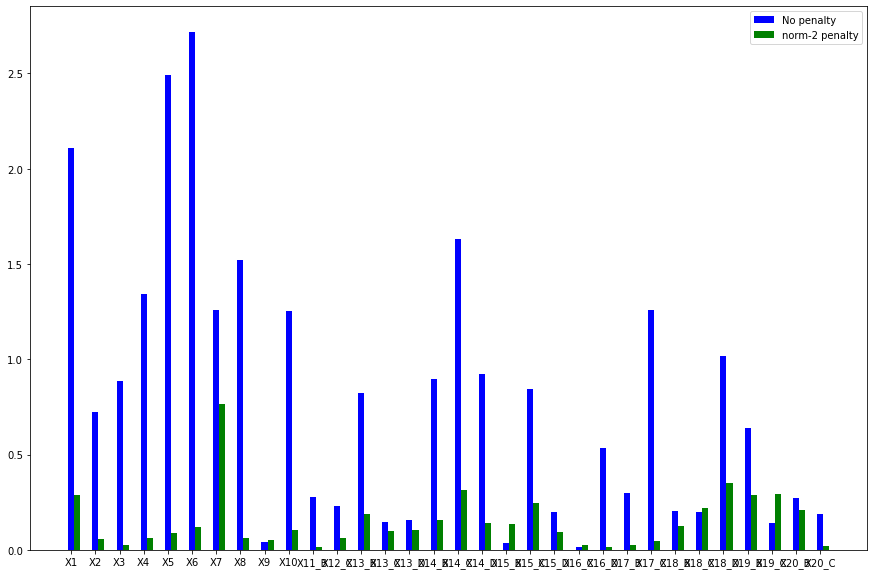

In [36]:
# Visualisation des différences en valeur absolue

# Declaring the figure (width, height)
plt.figure(figsize=[15, 10])

# Data to be plotted
height = np.abs(np.concatenate(result.coef_)) # np.concatenate transforme un array en vecteur
height_l2 = np.abs(np.concatenate(result_l2.coef_))
variables = X.columns
x_pos = np.arange(len(variables))

# Create bars
plt.bar(x_pos, height, color = 'b', width = 0.25)
plt.bar(x_pos+ 0.25, height_l2, color = 'g', width = 0.25)

# Create names on the x-axis
plt.xticks(x_pos,variables)

# Creating the legend of the bars in the plot
plt.legend(['No penalty', 'norm-2 penalty'])

# Show graphic
plt.show()

On constate l'effet de "shrinkage". 

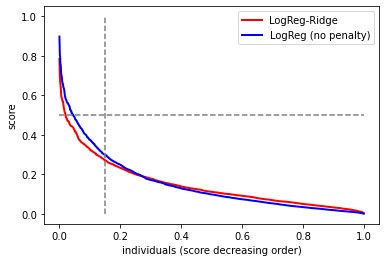

In [37]:
# On trace les courbes de score sur les données de test pour nos deux classifieurs
pred_test_l2 = pd.DataFrame({
    'Y': Y_test, 
    'score' : result_l2.predict_proba(X_test)[:,1], 
    })

pred_test = pd.DataFrame({
    'Y': Y_test, 
    'score' : result.predict_proba(X_test)[:,1], 
    })

# on ordonne les prédictions par score décroissant
pred_test_l2 = pred_test_l2.sort_values(by='score', ascending=False) 
pred_test = pred_test.sort_values(by='score', ascending=False) 

plt.xlabel('individuals (score decreasing order)')
plt.ylabel('score')

# Courbes de scores 
plt.subplot()
x = np.linspace(0, 1, len(pred_test.score))

plt.plot(x, pred_test_l2.score, linewidth=2, color='r', label=f"LogReg-Ridge") 
plt.plot(x, pred_test.score, linewidth=2, color='b', label=f"LogReg (no penalty)") 

# repères 
plt.vlines(0.15,0,1,color='gray',linestyle='dashed') # 15% d'individus avec y=1
plt.hlines(0.5,0,1,color='gray',linestyle='dashed') # seuil t=1/2

plt.legend(loc="upper right")
plt.show()

Ici on constate que les deux prédicteurs sont différents. La pénalisation donne des probabilités moins tranchées pour les deux classes ; ie les scores élevés (resp. faibles) sont plus faibles (resp. plus forts) que pour la régression non pénalisée. Les 15% d'individus avec $y=1$ devraient être à gauche (score de défaut élevé) et la régression pénalisée $\ell_2$ leur attribue un score inférieur à celui donné par la régression simple. **Warning interpréter la courbe horizontale ou la virer?**
   

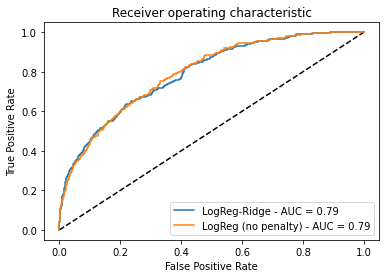

In [38]:
# Comparons les deux classifieurs via leurs courbes ROC et les AUC-ROC

fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

# Sur le jeu de TEST, on reprend les scores prédits (probas que Y=1) 
scores_test_l2= logreg_l2.predict_proba(X_test)[:,1]
Y_pred_l2= logreg_l2.predict(X_test)
fpr, tpr, _ = roc_curve(Y_test, scores_test_l2) # on calcule les FPR et TPR pour tout un ensemble de seuils t non précisés
ax.plot(fpr, tpr, label=f"LogReg-Ridge - AUC = %0.2f" % auc(fpr, tpr))

scores_test= logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test, scores_test) # on calcule les FPR et TPR pour tout un ensemble de seuils t non précisés
ax.plot(fpr, tpr, label=f"LogReg (no penalty) - AUC = %0.2f" % auc(fpr, tpr))

plt.legend(loc="lower right")
plt.show()

Les performances sont les mêmes en termes d'AUC-ROC. Regardons ce qui se passe pour la courbe precision-recall.

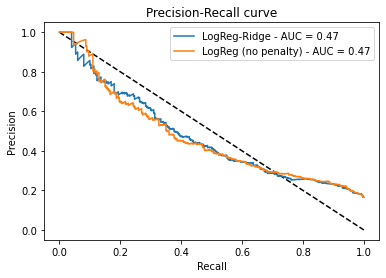

In [39]:
# On compare maintenant les deux classifieurs via leurs courbes PR et les valeurs AUC-PR

fig, ax = plt.subplots()
ax.plot([0, 1], [1,0], 'k--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')

# Sur le jeu de TEST 
# pour la prediction pénalisée en norme 2
precision, recall, _ = precision_recall_curve(Y_test, scores_test_l2)
ax.plot(recall, precision, label=f"LogReg-Ridge - AUC = %0.2f" % metrics.auc(recall,precision)) 

#  pour la prédiction sans pénalité 
precision, recall, _ = precision_recall_curve(Y_test, scores_test) 
ax.plot(recall, precision, label=f"LogReg (no penalty) - AUC = %0.2f" % metrics.auc(recall,precision))

plt.legend(loc="upper right")
plt.show()

Là encore, on a les mêmes performances en termes d'AUC-PR.

## Regression logistique avec sélection de variables

Dans cette partie, on va mettre en oeuvre une pénalité $\ell_1$ dans la régression logistique. Cela va nous permettre de faire de la sélection de variables : les variables peu informatives pour la prédiction ne seront plus du tout utilisées (coefficient $w_i$ estimé à 0). On espère ainsi améliorer les performances de notre prédicteur. 

### Exercice 7

Mettre en oeuvre la régression logistique avec pénalité $\ell_1$ sur les données d'apprentissage (précisez le `solver` `"liblinear"`). On utilisera une pénalité assez forte (ex $C=0.01$). 
Comparer les valeurs des coefficients avec le cas sans pénalité (visualisez l'effet d'annulation des coefficients). 
Évaluer les performances du classifieur sur les données de test.
Pour les deux classifieurs (logreg et sa version pénalisée en norme 1), comparer les courbes de score sur les données Test ainsi que les performances en termes de courbes (ROC et precision-recall) et d'AUC. 

In [40]:
# your answer

### Réponse

In [41]:
# Définition du modèle de régression logistique : pénalisation norme 1 
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01, max_iter=1000)
# On estime les paramètres de ce modèle sur les données 
result_l1 = logreg_l1.fit(X_train, Y_train)

# Resultats de la regression logistique pénalisée en norme 1
# On visualise l'intercept b et les 32 coefficients w_i estimés pour les 32 variables 
print(result_l1.intercept_)
print('------')
print(result_l1.coef_)

[-1.48922541]
------
[[-0.27366528  0.          0.          0.          0.          0.
   0.71074086  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.01592012
   0.          0.         -0.36807096  0.         -0.3485026   0.
   0.          0.        ]]


On constate qu'un grand nombre de coefficients de la régression pénalisée $\ell_1$ sont mis à 0.

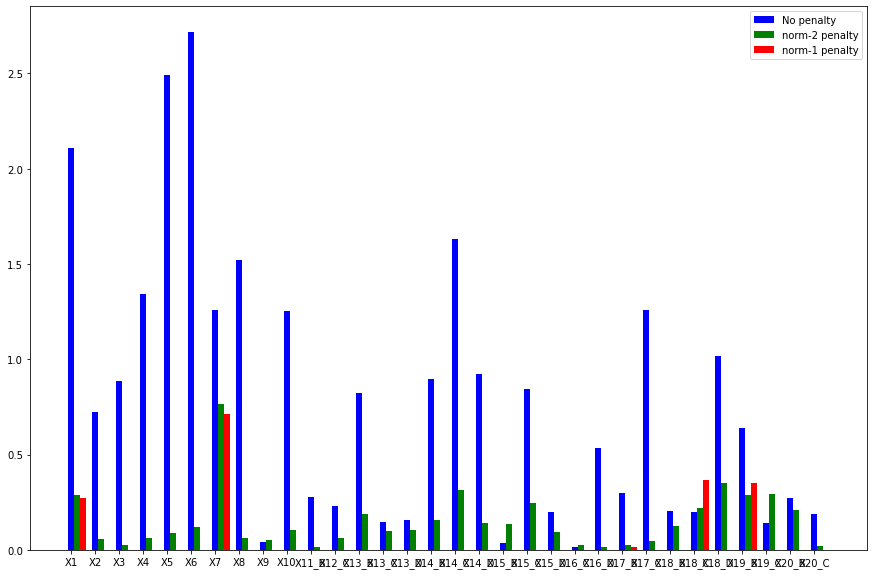

In [42]:
# Visualisation des différences en valeur absolue

# Declaring the figure (width, height)
plt.figure(figsize=[15, 10])

# Data to be plotted
height = np.abs(np.concatenate(result.coef_)) # np.concatenate transforme un array en vecteur
height_l2 = np.abs(np.concatenate(result_l2.coef_))
height_l1 = np.abs(np.concatenate(result_l1.coef_))
variables = X.columns
x_pos = np.arange(len(variables))

# Create bars
plt.bar(x_pos, height, color = 'b', width = 0.25)
plt.bar(x_pos+ 0.25, height_l2, color = 'g', width = 0.25)
plt.bar(x_pos+ 0.5, height_l1, color = 'red', width = 0.25)

# Create names on the x-axis
plt.xticks(x_pos,variables)

# Creating the legend of the bars in the plot
plt.legend(['No penalty', 'norm-2 penalty','norm-1 penalty'])

# Show graphic
plt.show()

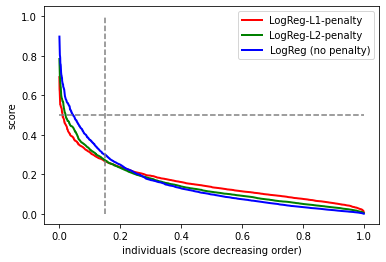

In [43]:
# On trace les courbes de score sur les données de test pour nos deux classifieurs (sans pénalité et pénalité en norme 1)

pred_test_l1 = pd.DataFrame({
    'Y': Y_test, 
    'score' : result_l1.predict_proba(X_test)[:,1], 
    })

# le data-frame ci-dessous a déjà été créé ci-dessus
#pred_test = pd.DataFrame({
#    'Y': Y_test, 
#    'score' : result.predict_proba(X_test)[:,1], 
#    })

# on ordonne les prédictions par score décroissant
pred_test_l1 = pred_test_l1.sort_values(by='score', ascending=False) 

plt.xlabel('individuals (score decreasing order)')
plt.ylabel('score')

# Courbes de scores 
plt.subplot()
x = np.linspace(0, 1, len(pred_test.score))

plt.plot(x, pred_test_l1.score, linewidth=2, color='r', label=f"LogReg-L1-penalty") 
plt.plot(x, pred_test_l2.score, linewidth=2, color='green', label=f"LogReg-L2-penalty") 
plt.plot(x, pred_test.score, linewidth=2, color='b', label=f"LogReg (no penalty)") 

# repères 
plt.vlines(0.15,0,1,color='gray',linestyle='dashed') # 15% d'individus avec y=1
plt.hlines(0.5,0,1,color='gray',linestyle='dashed') # seuil t=1/2

plt.legend(loc="upper right")
plt.show()

Encore une fois, on constate que les deux prédicteurs sont différents. La pénalisation donne des probabilités moins tranchées pour les deux classes ; ie les scores élevés (resp. faibles) sont plus faibles (resp. plus forts) que pour la régression non pénalisée. Les 15% d'individus avec $y=1$ devraient être à gauche (score de défaut élevé) et la régression pénalisée $\ell_1$ leur attribue un score inférieur à celui donné par la régression simple ou par la régression $\ell_2$. **Warning interpréter la courbe horizontale ou la virer?**
   

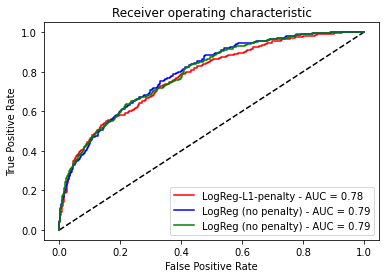

In [44]:
# Comparons les classifieurs via leurs courbes ROC et les AUC-ROC

fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

# Sur le jeu de TEST, on reprend les scores prédits (probas que Y=1) 
scores_test_l1= logreg_l1.predict_proba(X_test)[:,1]
Y_pred_l1= logreg_l1.predict(X_test)
fpr, tpr, _ = roc_curve(Y_test, scores_test_l1) # on calcule les FPR et TPR pour tout un ensemble de seuils t non précisés
ax.plot(fpr, tpr, color='r',label=f"LogReg-L1-penalty - AUC = %0.2f" % auc(fpr, tpr))

# courbe ROC régression simple
fpr, tpr, _ = roc_curve(Y_test, scores_test) # on calcule les FPR et TPR pour tout un ensemble de seuils t non précisés
ax.plot(fpr, tpr, color='b',label=f"LogReg (no penalty) - AUC = %0.2f" % auc(fpr, tpr))

# courbe ROC régression pénalisée L2
fpr, tpr, _ = roc_curve(Y_test, scores_test_l2) # on calcule les FPR et TPR pour tout un ensemble de seuils t non précisés
ax.plot(fpr, tpr, color='green',label=f"LogReg (no penalty) - AUC = %0.2f" % auc(fpr, tpr))


plt.legend(loc="lower right")
plt.show()

Les performances sont légèrement moins bonnes en termes d'AUC-ROC. Regardons ce qui se passe pour la courbe precision-recall.

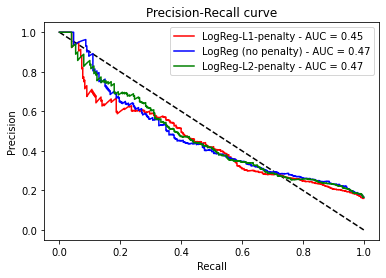

In [45]:
# On compare maintenant les deux classifieurs via leurs courbes PR et les valeurs AUC-PR

fig, ax = plt.subplots()
ax.plot([0, 1], [1,0], 'k--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')

# Sur le jeu de TEST 
# pour la prediction pénalisée en norme 1
precision, recall, _ = precision_recall_curve(Y_test, scores_test_l1)
ax.plot(recall, precision, color='r',label=f"LogReg-L1-penalty - AUC = %0.2f" % metrics.auc(recall,precision)) 

#  pour la prédiction sans pénalité 
precision, recall, _ = precision_recall_curve(Y_test, scores_test) 
ax.plot(recall, precision, color='b',label=f"LogReg (no penalty) - AUC = %0.2f" % metrics.auc(recall,precision))

# pour la prediction pénalisée en norme 2
precision, recall, _ = precision_recall_curve(Y_test, scores_test_l2)
ax.plot(recall, precision, color='green',label=f"LogReg-L2-penalty - AUC = %0.2f" % metrics.auc(recall,precision)) 

plt.legend(loc="upper right")
plt.show()

Là encore, on a des performances un peu dégradées pour la régression en pénalité $\ell_1$ en termes d'AUC-PR.

### Chemins de régularisation (pour la pénalité $\ell_1$)

Dans cette partie, on va visualiser l'effet de la constante de pénalité sur l'évolution des coefficients $w_i$, à travers les chemins de régularisation. Lorsque la pénalité est très forte (i.e $C$ très petite), aucune  variable n'est sélectionnée (tous les coefficients $w_i$ sont estimés à 0). Dans ce cas, la fonction de régression logistique est constante (on a seulement un intercept) et le lien entre $y$ et $X$ est très mal appris. Puis au fur et à mesure que $C$ augmente, on inclue de plus en plus de variables dans notre régression logistique. Lorsque $C$ est très grande, on ne pénalise plus et on retrouve les résultats de la régression logistique simple. 

In [46]:
# On fabrique un ensemble de valeurs C entre 10^(-4) et 10^2
c_path = np.logspace(-4, 2, 10)
# c_path plus long ==> durée calcul plus longue
print(c_path) 


[1.00000000e-04 4.64158883e-04 2.15443469e-03 1.00000000e-02
 4.64158883e-02 2.15443469e-01 1.00000000e+00 4.64158883e+00
 2.15443469e+01 1.00000000e+02]


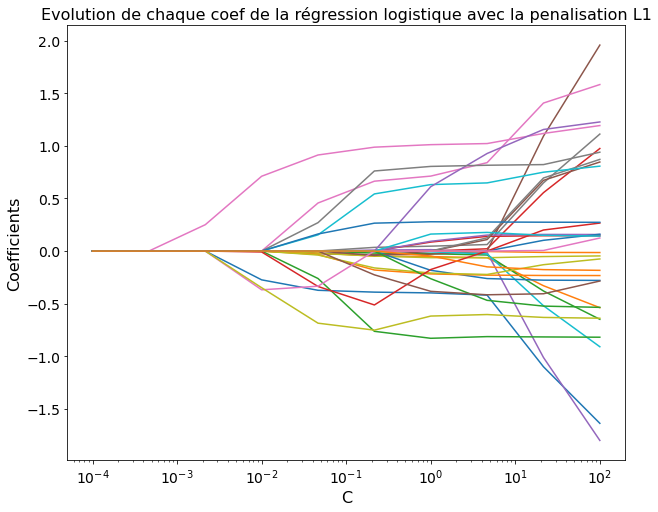

In [47]:
# Chemin de régularisation 
logregC = LogisticRegression(penalty='l1', solver='liblinear')
coeffs = []
for c in c_path:
    logregC.C = c
    logregC.fit(X_train, Y_train)
    coeffs.append(logregC.coef_.ravel().copy())

coeffs = np.array(coeffs)
plt.figure(figsize=(10, 8))
plt.semilogx(c_path, coeffs)
ymin, ymax = plt.ylim()
plt.xlabel('C', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Coefficients', fontsize=16)
plt.yticks(fontsize=14)
plt.title('Evolution de chaque coef de la régression logistique '
          'avec la penalisation L1', fontsize=16)

plt.show()

## Validation croisée pour le choix de la constante de pénalité 

### Régression logistique avec sélection de variables (pénalité $\ell_1$ + validation croisée)

À chaque fois qu'on utilise une pénalité, il faut choisir la constante de pénalisation. 
Attention : la fonction LogisticRegression ne sait pas choisir la constante de pénalisation, qui par défaut est fixée à 1. Ce choix est parfaitement débile (car il ne correspond à rien) et n'a aucune raison d'être utilisé. 

Dans cette partie, on va mettre en oeuvre le choix de la constante de pénalisation par validation croisée. 
Nous le ferons dans le cadre d'une pénalité $\ell_1$ mais on pourrait faire exactement la même chose avec un autre type de pénalité. 


### Exercice 8

Utiliser la fonction `LogisticRegressionCV` pour sélectionner automatiquement par validation croisée  la constante $C$ de pénalité dans un modèle de régression logistique avec pénalité $\ell_1$. 

In [48]:
# Your answer

### Réponse

In [49]:
from sklearn.linear_model import LogisticRegressionCV

# Modèle de régression logistique avec pénalité l1 et validation croisée pour le choix automatique de la constante de pénalité C
logreg_cv = LogisticRegressionCV(penalty='l1',
                                 tol=1e-3,
                                 Cs=np.logspace(-3, 5, 15), # grille de 15 valeurs pour C entre 10^-3 et 10^5
                                 cv=3, # normalement CV avec 10 folds ; ici 3 pour gagner du temps
                                 solver='liblinear',
                                 # class_weight='balanced',
                                 scoring='roc_auc') # le critère pour comparer les différents modèles par CV - Par défaut c'est l'accuracy
logreg_cv.fit(X_train, Y_train)

# résultats intermédiaires de calculs de ROC-AUC sur chacun des cv-folds
crit = logreg_cv.scores_[1]
print(crit)

[[0.5        0.70525695 0.73351456 0.74681738 0.76021504 0.76035951
  0.75985333 0.75903617 0.75869982 0.7586116  0.75864027 0.75846052
  0.7586116  0.75844398 0.75857852]
 [0.5        0.71905051 0.76383657 0.77641376 0.78671372 0.78667071
  0.78560432 0.78457102 0.78425562 0.7842082  0.78410344 0.78414094
  0.78406815 0.78415637 0.78411226]
 [0.5        0.72002317 0.75911077 0.77089144 0.78057811 0.77989409
  0.77882392 0.77832193 0.77795565 0.77786849 0.77776589 0.77778575
  0.7778365  0.77788063 0.77755847]]


In [50]:
np.logspace(-3, 5, 15)

array([1.00000000e-03, 3.72759372e-03, 1.38949549e-02, 5.17947468e-02,
       1.93069773e-01, 7.19685673e-01, 2.68269580e+00, 1.00000000e+01,
       3.72759372e+01, 1.38949549e+02, 5.17947468e+02, 1.93069773e+03,
       7.19685673e+03, 2.68269580e+04, 1.00000000e+05])

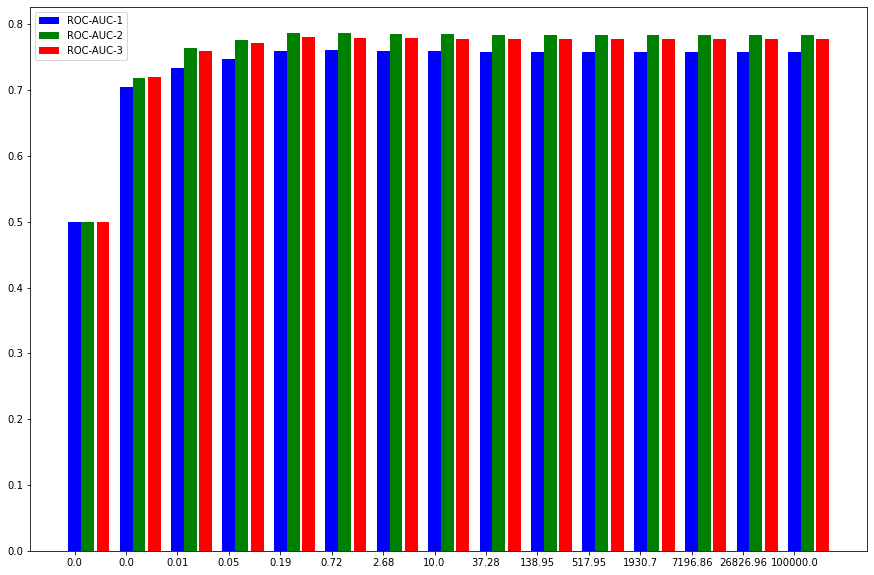

In [51]:
# Visualisation du critère sur chaque fold pour les différentes valeurs de C

# Declaring the figure (width, height)
plt.figure(figsize=[15, 10])

# X-axis
variables = np.round(np.logspace(-3, 5, 15),2) # on arrondit les valeurs de C affichées
x_pos = np.arange(len(variables))

# Create bars
plt.bar(x_pos, crit[0], color = 'b', width = 0.25)
plt.bar(x_pos+ 0.25, crit[1], color = 'g', width = 0.25)
plt.bar(x_pos+ 0.55, crit[2], color = 'r', width = 0.25)

# Create names on the x-axis
plt.xticks(x_pos,variables)

# Creating the legend of the bars in the plot
plt.legend(['ROC-AUC-1', 'ROC-AUC-2','ROC-AUC-3'])

# Show graphic
plt.show()


Ci-dessus pour chacun des folds, on a la valeur du critère (ROC_AUC) pour chacune des 15 valeurs différentes de la constante C. La variabilité sur chacune des 3 répétitions est due à l'aléa. Lorsque $C$ est très petite, on pénalise beaucoup et le critère ROC-AUC n'est pas bon. Lorsque $C$ augmente, à partir d'un moment on n'améliore pas la valeur du critère. 

Ce qui nous intéresse, pour chaque valeur de C, c'est la valeur du critère moyennée sur les cv répétitions.

[0.5        0.71477687 0.75215396 0.76470753 0.77583562 0.77564143
 0.77476052 0.77397637 0.77363703 0.77356277 0.7735032  0.7734624
 0.77350542 0.77349366 0.77341642]


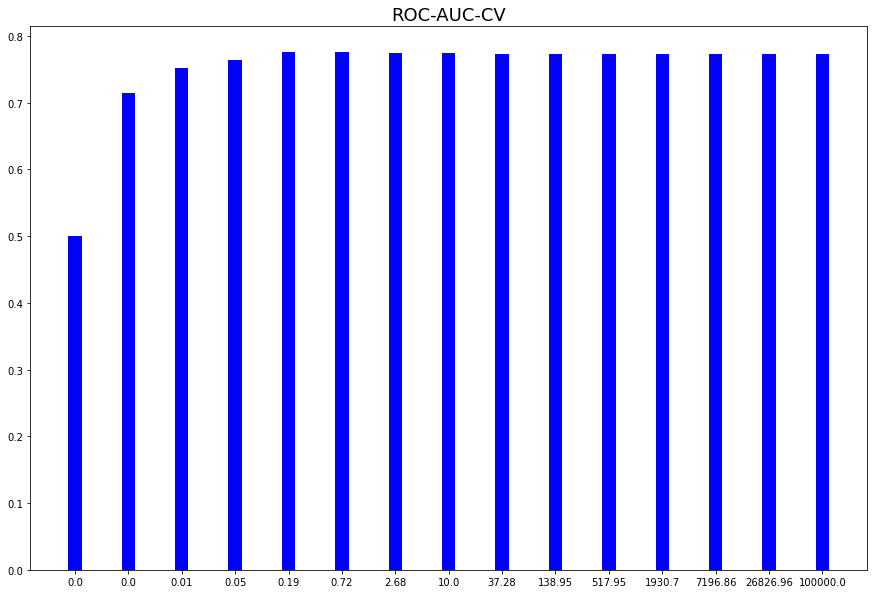

In [52]:
# Visualisation du critère global de CV 

score_boot = crit.mean(axis=0)
print(score_boot)

# Declaring the figure (width, height)
plt.figure(figsize=[15, 10])

# X-axis
#variables = np.logspace(-3, 5, 15)
#x_pos = np.arange(len(variables))

# Create bars
plt.bar(x_pos, score_boot, color = 'b', width = 0.25)
# Create names on the x-axis and title
plt.xticks(x_pos,variables)
plt.title('ROC-AUC-CV', fontsize=18)

# Show graphic
plt.show()


On voit bien que pour C=10^(-3), la pénalité est trop forte. On ne sélectionne aucune variable et on prédit au hasard (AUC-ROC=0,5).

Quand C devient grand, la pénalité diminue, et on sur-ajuste le modèle. 

La valeur optimale (qui donne le plus grand ROC_AUC moyen) est obtenue directement:

In [53]:
C_opt = logreg_cv.C_[0]
print("C optimale =", C_opt)

C optimale = 0.19306977288832497


### Exercice 9 

Il faut à présent apprendre le modèle (de régression logistique pénalisée en nomre 1) avec ce C optimal (car pour l'instant on a 3 classifieurs différents construits avec cette valeur sur chacun des folds et de toutes façons on y a pas accès !). Ensuite, tracer les courbes ROC et PR et les comparer au classifieur sans pénalité.

In [54]:
# your answer

### Réponse

In [55]:
# Régression logistique avec pénalisation norme 1 et constante optimale (choisie par CV)
logreg_l1Coptim = LogisticRegression(penalty='l1', solver='liblinear', C=C_opt, max_iter=1000)
# On estime les paramètres de ce modèle sur les données 
result_l1Coptim = logreg_l1Coptim.fit(X_train, Y_train)

Comparons le modèle complet sans pénalité avec le modèle pénalisé avec sélection automatique de la constante de pénalité

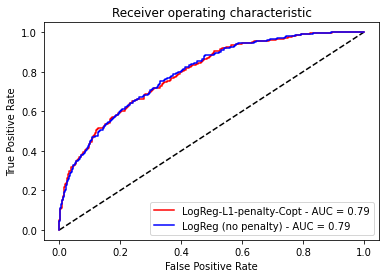

In [56]:
# Comparons les classifieurs via leurs courbes ROC et les AUC-ROC

fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

# Sur le jeu de TEST, on reprend les scores prédits (probas que Y=1) 
scores_test_l1Coptim= logreg_l1Coptim.predict_proba(X_test)[:,1]
Y_pred_l1Coptim= logreg_l1Coptim.predict(X_test)
fpr, tpr, _ = roc_curve(Y_test, scores_test_l1Coptim) # on calcule les FPR et TPR pour tout un ensemble de seuils t non précisés
ax.plot(fpr, tpr, color='r',label=f"LogReg-L1-penalty-Copt - AUC = %0.2f" % auc(fpr, tpr))

# courbe ROC régression simple
fpr, tpr, _ = roc_curve(Y_test, scores_test) # on calcule les FPR et TPR pour tout un ensemble de seuils t non précisés
ax.plot(fpr, tpr, color='b',label=f"LogReg (no penalty) - AUC = %0.2f" % auc(fpr, tpr))

plt.legend(loc="lower right")
plt.show()

Les performances semblent identiques, mais la version pénalisée utilise beaucoup moins de variables. 

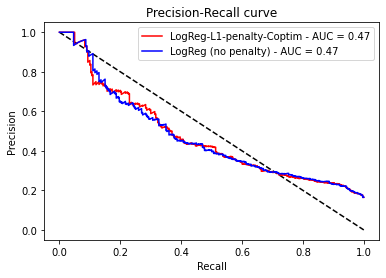

In [57]:
# On compare maintenant les deux classifieurs via leurs courbes PR et les valeurs AUC-PR

fig, ax = plt.subplots()
ax.plot([0, 1], [1,0], 'k--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')

# Sur le jeu de TEST 
# pour la prediction pénalisée en norme 1
precision, recall, _ = precision_recall_curve(Y_test, scores_test_l1Coptim)
ax.plot(recall, precision, color='r',label=f"LogReg-L1-penalty-Coptim - AUC = %0.2f" % metrics.auc(recall,precision)) 

#  pour la prédiction sans pénalité 
precision, recall, _ = precision_recall_curve(Y_test, scores_test) 
ax.plot(recall, precision, color='b',label=f"LogReg (no penalty) - AUC = %0.2f" % metrics.auc(recall,precision))

plt.legend(loc="upper right")
plt.show()

**Warning** : quand on fait la CV, on n'impose pas 'stratify=Y' pour faire les folds????